**Imports**

In [ ]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd
from datetime import datetime

CapeTown = pd.read_csv('CapeTown_CPT_2014.csv', skipinitialspace=True)

**Cleaning data**

In [2]:
CapeTown.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,28,23,18,19,17,15,88,71,45,...,19.0,14.0,10.0,35,14,NaN,0.0,2.0,NaN,213<br />
1,2014-1-2,28,23,18,19,18,16,88,74,46,...,26.0,13.0,10.0,32,21,NaN,0.0,2.0,NaN,204<br />
2,2014-1-3,27,23,19,19,18,18,94,75,48,...,31.0,12.0,3.0,32,26,NaN,0.0,4.0,NaN,193<br />
3,2014-1-4,27,22,18,19,18,14,88,74,46,...,26.0,13.0,9.0,32,18,NaN,0.0,3.0,NaN,314<br />
4,2014-1-5,26,22,18,17,16,14,83,70,46,...,26.0,13.0,10.0,45,21,NaN,0.0,4.0,Rain,25<br />


In [3]:
#Renaming column 'WindDirDegrees<br /> to 'WindDirDegrees'

CapeTown = CapeTown.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

In [5]:
#Removing the  `< br />`  html line breaks from the values in the `'WindDirDegrees'` column.

CapeTown['WindDirDegrees'] = CapeTown['WindDirDegrees'].str.rstrip('<br />')

In [10]:
CapeTown.dtypes                                                        

Date                           object
Max TemperatureC                int64
Mean TemperatureC               int64
Min TemperatureC                int64
Dew PointC                      int64
MeanDew PointC                  int64
Min DewpointC                   int64
Max Humidity                    int64
Mean Humidity                   int64
Min Humidity                    int64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm              float64
Mean VisibilityKm             float64
Min VisibilitykM              float64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h            float64
Precipitationmm               float64
CloudCover                    float64
Events                         object
WindDirDegrees                 object
dtype: object

In [ ]:
 #Changing the values in the `'WindDirDegrees'` column to `float64`
    
CapeTown['WindDirDegrees'] = CapeTown['WindDirDegrees'].astype('float64')

In [ ]:
#Changing the values in the 'GMT' column into values of the datetime64 date type. 

CapeTown['Date'] = pd.to_datetime(CapeTown['Date'])

In [ ]:
#change default index to the datetime64

CapeTown.index = CapeTown['Date']

**Finding Summer Break in Cape Town**

The summer season in Cape Town starts in the end of December and ends mid-March


In [ ]:
summer = CapeTown.loc[datetime(2014,1,1) : datetime(2014,3,16)]

In [17]:
%matplotlib inline

**Finding warm temperature within summer**

<AxesSubplot:xlabel='Date'>

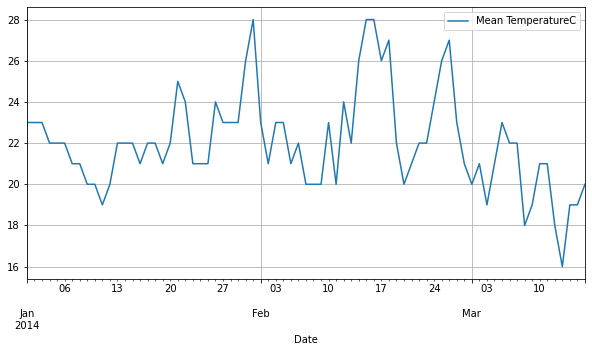

In [20]:
summer['Mean TemperatureC'].plot(grid=True, figsize=(10,5),legend= "top right")

Looking at the graph, ranges between 16 and 28 degrees Celsius. 

However the temperature does seem to generally be highest in February. How about rainfall?



<AxesSubplot:xlabel='Date'>

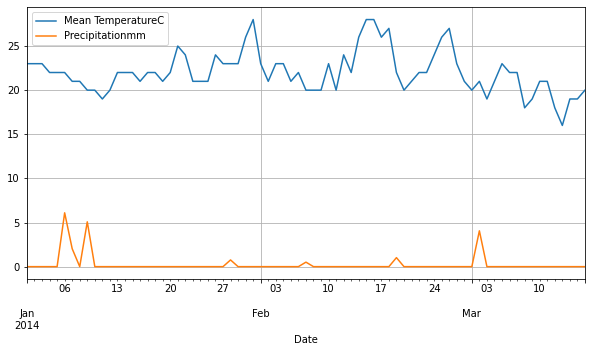

In [22]:
summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5),legend= "top left")

There seems to be the least amount of rain for the period from 13th January to 1st March, and from 3rd March to 18th March. 

Looking at the graph, nicer temperatures are observed in January and February, thus best dates for holiday booking. 

The end of January looks good, with perfect sunbathing temperatures ranging from 20-26 degrees C, and no significant rain. Mid Feb between 0th to 20th also looks good with temperatures ranging from 20-26 degrees C, and no significant rain as well. 

Due to the warm but not too high temperatures found in the beginning of February, as well as the low amount of rain, the best 2 weeks to book a holiday to Cape Town would be the first 2 weeks of February.